### Importing the dependencies

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
%matplotlib inline

In [33]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)

### Data transformation

In [34]:
df = pd.read_csv("heart-disease_data.cleveland.csv",header = None)

In [35]:
df.shape

(303, 14)

In [36]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

In [37]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [38]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [40]:
#filling the missing values
df['ca'] = df.ca.fillna(df.ca.mean())
df['thal'] = df.thal.fillna(df.thal.mean())

In [41]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [42]:
df.target = df.target.map({0:0,1:1,2:1,3:1,4:1})

### data visualisation

In [43]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1


In [44]:
#distribution of age vs count

import seaborn as sns
import matplotlib.pyplot as plt

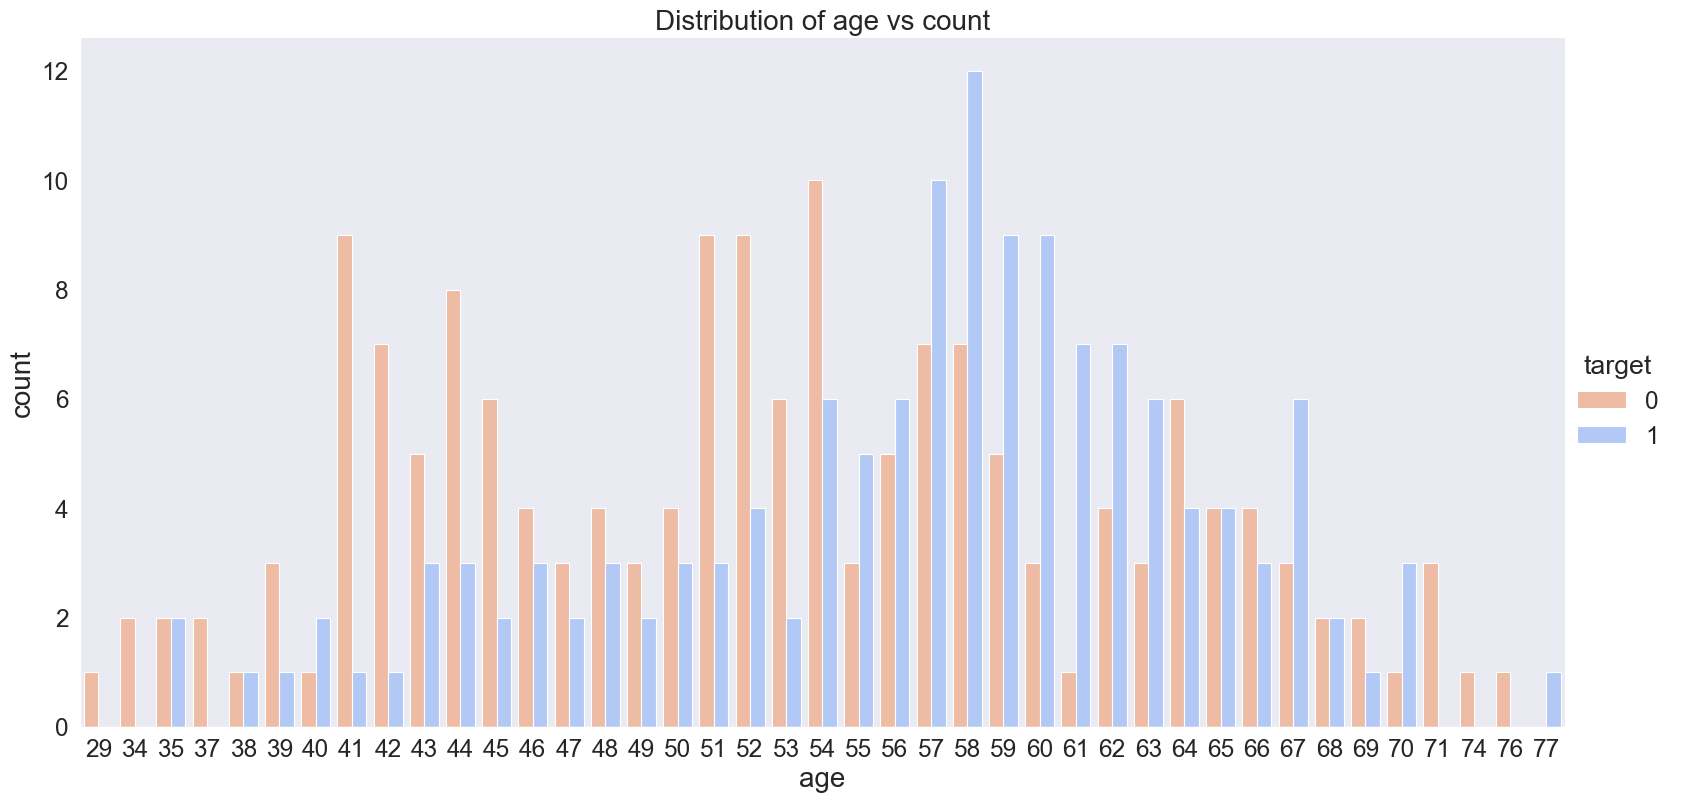

In [45]:
sns.set(style = "dark")
sns.set_context('paper',font_scale=2,rc = {"font.size": 15,"font.weight":'bold',"axes.titlesize": 20,"axes.labelsize": 20})
sns.catplot(kind="count",data=df,x="age",hue="target",height=8,aspect=2,palette="coolwarm_r",saturation=0.8)
plt.title("Distribution of age vs count")
plt.show()

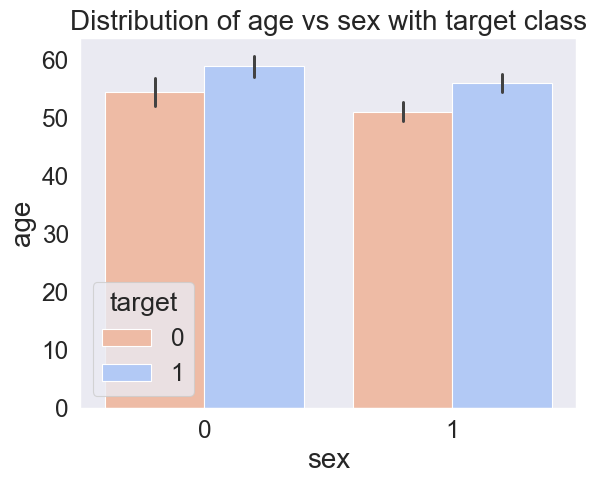

In [132]:
sns.barplot(data=df,x="sex",y="age",hue="target",palette = "coolwarm_r",saturation=0.8)
plt.title("Distribution of age vs sex with target class")
plt.show()

### data preprocesing

In [133]:
#seperating features and target
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train,X_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.2,shuffle=True)

In [136]:
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
lr_cla = LogisticRegression()
lr_cla 

LogisticRegression()

In [139]:
lr_cla.fit(X_train,y_train)

LogisticRegression()

In [140]:
y_pred_test = lr_cla.predict(X_test)
y_pred_train = lr_cla.predict(X_train)
y_pred_train

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0],
      dtype=int64)

In [141]:
input = np.array([44,1,2,120,263,0,0,173,0,0,1,0,7])
input = sc.transform([input])

In [142]:
prediction = lr_cla.predict(input)

if(prediction==1):
    print("The peron has a heart disease")
else:
    print("The person does not have a heart disease")

The person does not have a heart disease


In [143]:
input = np.array([60,1,4,117,230,1,0,160,1,1.4,1,2,7])
input = sc.transform([input])

prediction = lr_cla.predict(input)

if(prediction==1):
    print("The peron has a heart disease")
else:
    print("The person does not have a heart disease")

The peron has a heart disease


In [144]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Acuuracy of test set for Logistic regression is :",accuracy_score(y_test,y_pred_test))

Acuuracy of test set for Logistic regression is : 0.8524590163934426


In [145]:
cm_test = confusion_matrix(y_test,y_pred_test)
cm_train = confusion_matrix(y_train,y_pred_train)
print(cm_train)

[[116  15]
 [ 19  92]]


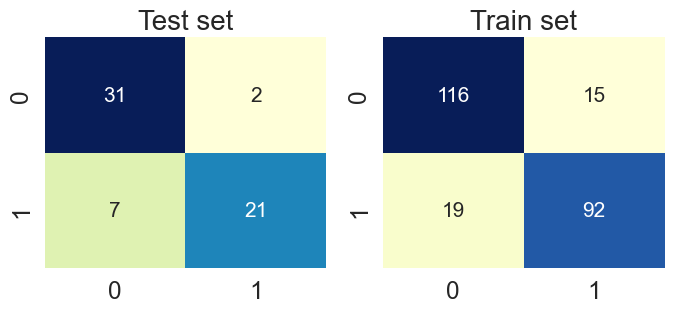

In [146]:
#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2,figsize=(8,3))

#create boxplot in each subplot
sns.heatmap(cm_test,ax=axes[0],annot=True,fmt="d",cbar=False,cmap="YlGnBu")
sns.heatmap(cm_train,ax=axes[1],annot=True,fmt="d",cbar=False,cmap="YlGnBu")
axes[0].set_title("Test set")
axes[1].set_title("Train set")
plt.show()


In [147]:
print('Accuracy for training set for lr  = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for lr = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy for training set for lr  = 0.859504132231405
Accuracy for test set for lr = 0.8524590163934426


In [148]:
lr_test=(cm_test[0][0] + cm_test[1][1])/len(y_test)
lr_train=(cm_train[0][0] + cm_train[1][1])/len(y_train)
lr_test,lr_train

(0.8524590163934426, 0.859504132231405)

### Decision Tree classifier

In [149]:
# Decision Trees

from sklearn.tree import DecisionTreeClassifier

In [150]:
d_cla = DecisionTreeClassifier()
d_cla

DecisionTreeClassifier()

In [151]:
d_cla.fit(X_train,y_train)

DecisionTreeClassifier()

In [152]:
y_pred_train = d_cla.predict(X_train)
y_pred_test = d_cla.predict(X_test)

In [153]:
input = np.array([44,1,2,120,263,0,0,173,0,0,1,0,7])
input = sc.transform([input])

prediction = lr_cla.predict(input)

if(prediction==1):
    print("The peron has a heart disease")
else:
    print("The person does not have a heart disease")

The person does not have a heart disease


In [154]:
input = np.array([60,1,4,117,230,1,0,160,1,1.4,1,2,7])
input = sc.transform([input])

prediction = lr_cla.predict(input)

if(prediction==1):
    print("The peron has a heart disease")
else:
    print("The person does not have a heart disease")

The peron has a heart disease


In [155]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Acuuracy of test set for Decision Tree classifier is :",accuracy_score(y_test,y_pred_test))

Acuuracy of test set for Decision Tree classifier is : 0.6885245901639344


In [156]:
cm_test = confusion_matrix(y_test,y_pred_test)
cm_train = confusion_matrix(y_train,y_pred_train)

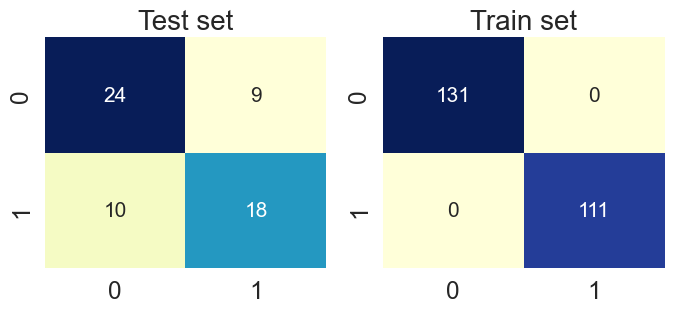

In [157]:
#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2,figsize=(8,3))

#create boxplot in each subplot
sns.heatmap(cm_test,ax=axes[0],annot=True,fmt="d",cbar=False,cmap="YlGnBu")
sns.heatmap(cm_train,ax=axes[1],annot=True,fmt="d",cbar=False,cmap="YlGnBu")
axes[0].set_title("Test set")
axes[1].set_title("Train set")
plt.show()

In [158]:
dtc_test=(cm_test[0][0] + cm_test[1][1])/len(y_test)
dtc_train=(cm_train[0][0] + cm_train[1][1])/len(y_train)

### Random Forest Classifier

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
r_cla = RandomForestClassifier(n_estimators=10)
r_cla

RandomForestClassifier(n_estimators=10)

In [161]:
r_cla.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [162]:
y_pred_train = r_cla.predict(X_train)
y_pred_test = r_cla.predict(X_test)

In [163]:
input = np.array([44,1,2,120,263,0,0,173,0,0,1,0,7])
input = sc.transform([input])

prediction = lr_cla.predict(input)

if(prediction==1):
    print("The peron has a heart disease")
else:
    print("The person does not have a heart disease")

The person does not have a heart disease


In [164]:
input = np.array([60,1,4,117,230,1,0,160,1,1.4,1,2,7])
input = sc.transform([input])

prediction = lr_cla.predict(input)

if(prediction==1):
    print("The peron has a heart disease")
else:
    print("The person does not have a heart disease")

The peron has a heart disease


In [165]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Acuuracy of test set for Random Forest Classifier is :",accuracy_score(y_test,y_pred_test))

Acuuracy of test set for Random Forest Classifier is : 0.7868852459016393


In [166]:
cm_test = confusion_matrix(y_test,y_pred_test)
cm_train = confusion_matrix(y_train,y_pred_train)

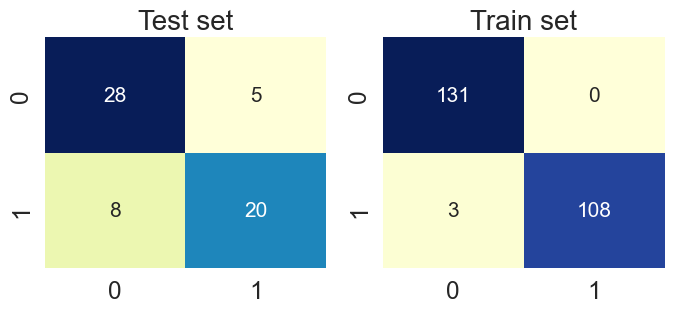

In [167]:
#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2,figsize=(8,3))

#create boxplot in each subplot
sns.heatmap(cm_test,ax=axes[0],annot=True,fmt="d",cbar=False,cmap="YlGnBu")
sns.heatmap(cm_train,ax=axes[1],annot=True,fmt="d",cbar=False,cmap="YlGnBu")
axes[0].set_title("Test set")
axes[1].set_title("Train set")
plt.show()

In [168]:
print('Accuracy for training set for rfc = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for rfc = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy for training set for rfc = 0.987603305785124
Accuracy for test set for rfc = 0.7868852459016393


In [169]:
rfc_test=(cm_test[0][0] + cm_test[1][1])/len(y_test)
rfc_train=(cm_train[0][0] + cm_train[1][1])/len(y_train)

### KNN classifier

In [170]:
from sklearn.neighbors import KNeighborsClassifier

In [171]:
classifier = KNeighborsClassifier(n_neighbors = 3)

In [172]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [173]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [174]:
input = np.array([60,1,4,117,230,1,0,160,1,1.4,1,2,7])
input = sc.transform([input])

prediction = lr_cla.predict(input)

if(prediction==1):
    print("The peron has a heart disease")
else:
    print("The person does not have a heart disease")

The peron has a heart disease


In [175]:
input = np.array([60,1,4,117,230,1,0,160,1,1.4,1,2,7])
input = sc.transform([input])

prediction = lr_cla.predict(input)

if(prediction==1):
    print("The peron has a heart disease")
else:
    print("The person does not have a heart disease")

The peron has a heart disease


In [176]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Acuuracy of test set for KNN classifier is :",accuracy_score(y_test,y_pred_test))

Acuuracy of test set for KNN classifier is : 0.7540983606557377


In [177]:
cm_test = confusion_matrix(y_test,y_pred_test)
cm_train = confusion_matrix(y_train,y_pred_train)

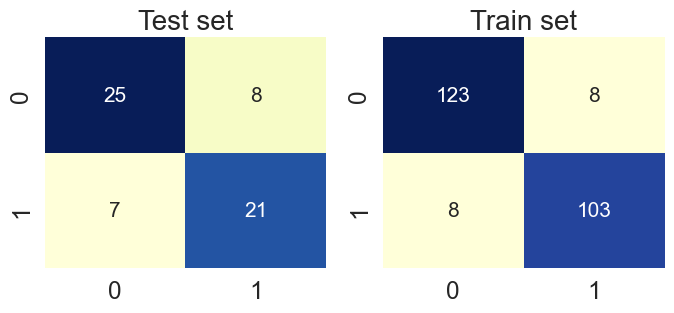

In [178]:
#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2,figsize=(8,3))

#create boxplot in each subplot
sns.heatmap(cm_test,ax=axes[0],annot=True,fmt="d",cbar=False,cmap="YlGnBu")
sns.heatmap(cm_train,ax=axes[1],annot=True,fmt="d",cbar=False,cmap="YlGnBu")
axes[0].set_title("Test set")
axes[1].set_title("Train set")
plt.show()

In [180]:
print('Accuracy for training set for knn = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for knn = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy for training set for knn = 0.9338842975206612
Accuracy for test set for knn = 0.7540983606557377


In [181]:
knn_test=(cm_test[0][0] + cm_test[1][1])/len(y_test)
knn_train=(cm_train[0][0] + cm_train[1][1])/len(y_train)

### Support Vector Machines (SVM)

In [182]:
from sklearn.svm import SVC

In [183]:
classifier = SVC()

In [184]:
classifier.fit(X_train,y_train)

SVC()

In [185]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [186]:
input = np.array([60,1,4,117,230,1,0,160,1,1.4,1,2,7])
input = sc.transform([input])

prediction = lr_cla.predict(input)

if(prediction==1):
    print("The peron has a heart disease")
else:
    print("The person does not have a heart disease")

The peron has a heart disease


In [187]:
input = np.array([60,1,4,117,230,1,0,160,1,1.4,1,2,7])
input = sc.transform([input])

prediction = lr_cla.predict(input)

if(prediction==1):
    print("The peron has a heart disease")
else:
    print("The person does not have a heart disease")

The peron has a heart disease


In [188]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Acuuracy of test set for SVM is :",accuracy_score(y_test,y_pred_test))

Acuuracy of test set for SVM is : 0.819672131147541


In [189]:
cm_test = confusion_matrix(y_test,y_pred_test)
cm_train = confusion_matrix(y_train,y_pred_train)

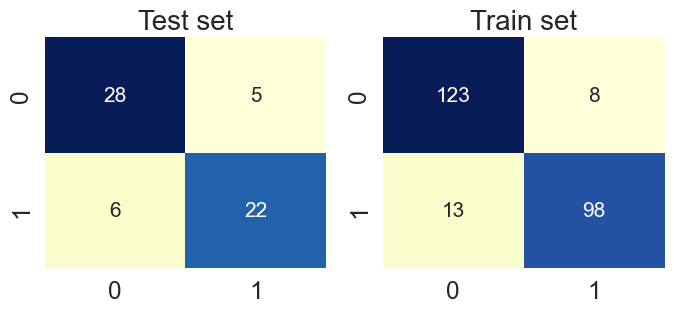

In [190]:
#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2,figsize=(8,3))

#create boxplot in each subplot
sns.heatmap(cm_test,ax=axes[0],annot=True,fmt="d",cbar=False,cmap="YlGnBu")
sns.heatmap(cm_train,ax=axes[1],annot=True,fmt="d",cbar=False,cmap="YlGnBu")
axes[0].set_title("Test set")
axes[1].set_title("Train set")
plt.show()

In [191]:
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy for training set for svm = 0.9132231404958677
Accuracy for test set for svm = 0.819672131147541


In [192]:
svm_test=(cm_test[0][0] + cm_test[1][1])/len(y_test)
svm_train=(cm_train[0][0] + cm_train[1][1])/len(y_train)

###  Naive Bayes

In [193]:
from sklearn.naive_bayes import GaussianNB

In [194]:
classifier = GaussianNB()

In [195]:
classifier.fit(X_train,y_train)

GaussianNB()

In [196]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [197]:
input = np.array([60,1,4,117,230,1,0,160,1,1.4,1,2,7])
input = sc.transform([input])

prediction = lr_cla.predict(input)

if(prediction==1):
    print("The peron has a heart disease")
else:
    print("The person does not have a heart disease")

The peron has a heart disease


In [198]:
input = np.array([60,1,4,117,230,1,0,160,1,1.4,1,2,7])
input = sc.transform([input])

prediction = lr_cla.predict(input)

if(prediction==1):
    print("The peron has a heart disease")
else:
    print("The person does not have a heart disease")

The peron has a heart disease


In [199]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Acuuracy of test set for naive bayes is :",accuracy_score(y_test,y_pred_test))

Acuuracy of test set for naive bayes is : 0.8360655737704918


In [200]:
cm_test = confusion_matrix(y_test,y_pred_test)
cm_train = confusion_matrix(y_train,y_pred_train)

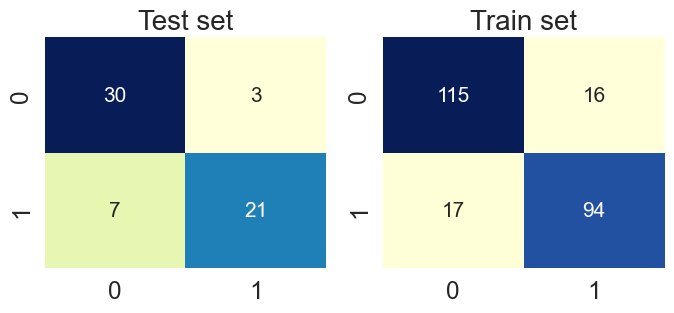

In [201]:
#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2,figsize=(8,3))

#create boxplot in each subplot
sns.heatmap(cm_test,ax=axes[0],annot=True,fmt="d",cbar=False,cmap="YlGnBu")
sns.heatmap(cm_train,ax=axes[1],annot=True,fmt="d",cbar=False,cmap="YlGnBu")
axes[0].set_title("Test set")
axes[1].set_title("Train set")
plt.show()

In [202]:
print('Accuracy for training set for nb = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for nb = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy for training set for nb = 0.8636363636363636
Accuracy for test set for nb = 0.8360655737704918


In [203]:
nb_test=(cm_test[0][0] + cm_test[1][1])/len(y_test)
nb_train=(cm_train[0][0] + cm_train[1][1])/len(y_train)

### Comparing the accuracies of various models

In [204]:
data = {'model':["LR", "DTC", "RFC", "KNN","SVM","NB","LR", "DTC", "RFC", "KNN","SVM","NB"],
        'type':["train","train","train","train","train","train","test","test","test","test","test","test"],
        'accuracy': [lr_train,dtc_train,rfc_train,knn_train,svm_train,nb_train,lr_test,dtc_test,rfc_test,knn_test,svm_test,nb_test]
       }
 
acc_data = pd.DataFrame(data)

In [205]:
acc_data

,model,type,accuracy
0,LR,train,0.859504
1,DTC,train,1.000000
2,RFC,train,0.987603
3,KNN,train,0.933884
4,SVM,train,0.913223
5,NB,train,0.863636
6,LR,test,0.852459
7,DTC,test,0.688525
8,RFC,test,0.786885
9,KNN,test,0.754098


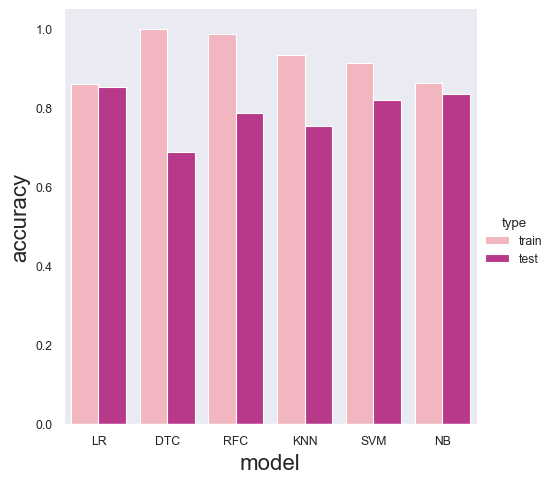

In [206]:
sns.set_context("paper", font_scale = 1, rc = {"font.size":12,"axes.labelsize": 16}) 
sns.catplot(kind="bar",x="model",y="accuracy",data=acc_data,hue="type",palette="RdPu")